# О возникновении силы тяги в системе вращающихся зарядов

In [1]:
%%cython
cdef extern from "lw_rotate.c":
    # расчет итерациями запаздывающего момента
    double tlag(long double x, long double y, long double z, long double t, 
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc,
                long double R, long double omega, long double alpha)
    
    long double tlag_test(long double x, long double y, long double z, long double t1, long double t2, 
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
               long double xc, long double yc, long double zc,
               long double R, long double omega, long double alpha)

    # отношение радиуса Лиенара Вихерта к радиусу
    long double klw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)
    # Радиус Лиенара Вихерта
    long double Rlw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)
    
    
    # phi_lw - скалярный потенциал Лиенара Вихерта
    long double philw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double q,
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)


    # A_lw - векторный потенциал Лиенара Вихерта
    void Alw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
             long double q,
             long double * A_x, long double * A_y, long double * A_z,
             long double xc, long double yc, long double zc, long double R, long double omega, long double alpha
           )
    
    void electr_magnet(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double q,
                long double * E_x, long double * E_y, long double * E_z, long double * B_x, long double * B_y, long double * B_z,
                       long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)

    void cset_c(long double _c)
    void cset_timespan_Epsilon(long double _eps)
    void cset_max_steps(int _max_steps)
    long double cget_c()
    long double cget_timespan_Epsilon()

cdef extern from "lw_vimanic.c":
    long double sx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double sy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double sz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double vx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double vy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double vz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double wx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double wy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double wz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double ccalc_sum_Fy_t(int N, long double t_i,
                      long double alpha0_l,
                      long double alpha0_r, int to_log);

    long double ccalc_Maxwells_stress_tensor(long double X_a, long double Y_a, long double Z_a, long double t_i,
                                     int N,
                                    long double cos_nx, long double cos_ny, long double cos_nz,
                                    long double alpha0_l,
                                    long double alpha0_r
                                   );

    long double spherical_ccalc_Maxwells_stress_tensor(
        long double r, long double theta, long double varphi, long double t)
    
    long double spherical_ccalc_Maxwells_stress_tensor_R_t(
        long double theta, long double varphi, long double t);

    void cset_sphere_R(long double R);
    long double cget_sphere_R();
    
    void cset_vc(long double vc)
    long double cget_vc()
    long double cget_omega()
    
    long double cget_S();
    long double cget_R_l();
    long double cget_R_r();

    long double cget_xc_l();
    long double cget_xc_r();

    long double cget_yc_l();
    long double cget_yc_r();

    long double cget_zc_l();
    long double cget_zc_r();
    

def calc_sum_Fy_t(N, t,
                  alpha0_l = 0,
                  alpha0_r = 0,
                  to_log = False):
    
    cdef int n = N
    cdef long double t_i = t

    cdef long double Alpha0_l = alpha0_l
    cdef long double Alpha0_r = alpha0_r
    cdef int To_log = to_log
    
    cdef long double Fy = ccalc_sum_Fy_t(n, t_i, Alpha0_l, Alpha0_r, To_log);

    return Fy

# Интегрируем в сферической системе координат,
# у которой однако в соотвествие с принятыми в задаче
# наименованиями осей главная ось игрек вместо зет
def spherical_calc_Maxwells_stress_tensor (r, theta, varphi, t) :
    cdef long double _r = r
    cdef long double _theta = theta
    cdef long double _varphi = varphi
    cdef long double _t = t
    
    return spherical_ccalc_Maxwells_stress_tensor(
        _r, _theta, _varphi, _t)

def spherical_calc_Maxwells_stress_tensor_R_t (theta, varphi, t) :
    cdef long double _theta = theta
    cdef long double _varphi = varphi
    cdef long double _t = t

    return spherical_ccalc_Maxwells_stress_tensor_R_t(_theta, _varphi, _t)

# направление векторов нормали к сферической воображаемой поверхности инвертировано - снаружи вовнутрь

def get_c():
    return cget_c()
def get_timespan_Epsilon():
    return cget_timespan_Epsilon()


def set_c(c):
    cset_c(c)
def set_timespan_Epsilon(eps):
    cset_timespan_Epsilon(eps)
def set_max_steps(_max_steps):
    cset_max_steps(_max_steps)
    
def set_vc(vc):
    cset_vc(vc)
def get_vc():
    return cget_vc()
def set_sphere_R(R):
    cset_sphere_R(R)
def get_sphere_R():
    return cget_sphere_R()
    
def get_S():
    return cget_S()
def get_R_l():
    return cget_R_l()
def get_R_r():
    return cget_R_r()
    
def get_omega():
    return cget_omega()

In [2]:
import numpy as np
set_c(1.0)
set_timespan_Epsilon(1.e-15)
set_vc(np.float128(0.8))

In [3]:
# радиус сферы интегрирования
R = 4 * get_R_l() + 2 * get_S()
R *= 1.5
# R = 40 * get_R_l() + 20 * get_S()

set_sphere_R(R)

get_sphere_R(), R, R^2

Matplotlib is building the font cache; this may take a moment.


(6.1499999999999995, 6.15000000000000, 37.8225000000000)

In [4]:
T = np.float128(2*pi)/get_omega() # период вращения
time_steps_number = 36000              # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [5]:
calc_sum_Fy_t(N = 1, t = T/3,
              alpha0_l = np.float128(0),
              alpha0_r = np.float128(0),
              to_log = True)

-0.579436383218458

In [6]:
from scipy import integrate as scipy_integrate

# epsabs
# float or int, optional
# Absolute error tolerance.
# Default is 1.49e-8.
# quad tries to obtain an accuracy of abs(i-result) <= max(epsabs, epsrel*abs(i))
# where i = integral of func from a to b, and result is the numerical approximation. See epsrel below.

# epsrel
# float or int, optional
# Relative error tolerance.
# Default is 1.49e-8.
# If epsabs <= 0, epsrel must be greater than both 5e-29 and 50 * (machine epsilon). See epsabs above.

# limit
# float or int, optional
# An upper bound on the number of subintervals used in the adaptive algorithm.

#Returns:
# result
# float
# The result of the integration.

# abserr
# float
# The maximum of the estimates of the absolute error in the various integration results.

# out_dict
# dict, optional
# A dict containing additional information on the integration.



nquad_default_opts = \
           { 'epsabs' : 1.49e-08,
             'epsrel' : 1.49e-08,
             'limit'  : 50 }

nquad_opts_2 = { 'epsabs' : 1.0e-07,
                 'epsrel' : 1.0e-07,
                 'limit'  : 100 }

nquad_opts_3 = { 'epsabs' : 1.0e-01,
                 'epsrel' : 1.0e-03,
                 'limit'  : 100 }
 
#nquad_opts = { 'epsabs' : 1.49e-07,
#               'epsrel' : 1.49e-07,
#               'limit'  : 200 }

#nquad_opts = { 'epsabs' : 1.49e-08,
#               'epsrel' : 1.49e-08,
#               'limit'  : 100 }

In [7]:
t_fy = []
#t_f_alpha_l = []
#t_f_alpha_r = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=1, t = t_i)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/time_steps_number, ans)]
    #t_f_alpha_l += [(i/time_steps_number, ans[1])]
    #t_f_alpha_r += [(i/time_steps_number, ans[2])]

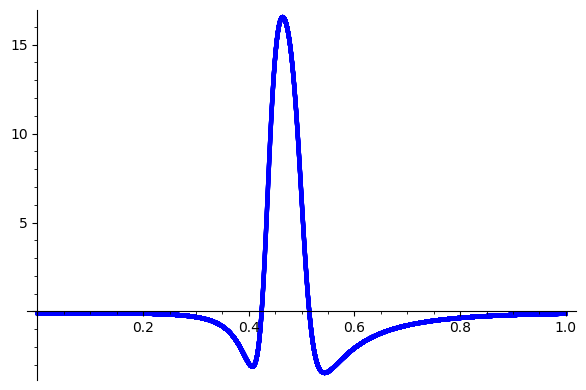

In [8]:
list_plot(t_fy)

In [9]:
#list_plot(t_f_alpha_l)

In [10]:
#list_plot(t_f_alpha_r)

In [11]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

1.9968991436058485487

In [12]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

0.25425309564867471003

In [13]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
int_fy = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=1, t = t), 0, T)
int_fy
# (-8.721028191840928e-10, 3.5107927765742514e-09)

(1.9968991436065568, 4.825394424371916e-10)

In [15]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
int_fy[0] / T

0.2542530956487648935

Начинаем расчёт силы интегрального давления поля на воображаемый ящик сферической формы окружающий систему зарядов (пусть например "ящик" будет идеально поглощающим излучение).

Тамм параграф 33

# Сведение объёмных сил к натяжениям

Рассмотрим некоторый объём среды $V$, ограниченный поверхностью $S$. Если $\vec f$ есть объёмная плотность сил, то равнодействующая всех сил, приложенная к телам, находящимся внутри объёма $V$, будет равна:

$$\vec F = \int\limits_{V}^{} \vec f dV. \,\,\,\,\,\,\,\,(33.1)$$

С другой стороны, если объёмные силы вообще могут быть сведены к натяжениям, то той же величине должна равняться и совокупность натяжений, действующих <i>извне</i> на замкнутую поверхность $S$.

Сила натяжения, испытываемая каким либо элементом поверхности произвольного участка среды, пропорциональна величине этого элемента $dS$ и зависит не только от положения этого элемента, но и от его направления, - иными словами, является не только функцией точки, но и функцией направления нормали $\vec n$ к элементу $dS$. В частности при повороте площадки $dS$ на $180^{\circ}$, то есть при изменении направления нормали $\vec n$ на обратное, сила натяжения меняет свой знак. В этом выражается тот факт, что на протипоположные стороны произвольного элемента поверхности $dS$ (за исключением элементов поверхности разрыва) всегда действуют взаимно уравновешивающиеся равные и противоположные натяжения.

Обозначим через $\vec T_n$ силу, действующую <i>извне</i> на единицу поверхности, внешняя нормаль к которой направлена по $\vec n$; компоненты этой силы по осям координат будем обозначать через $T_{xn}$, $T_{yn}$, $T_{zn}$. Тогда равнодействующая всех натяжений, приложенных извне к поверхности выразится, очевидно, через

$$\vec F = \oint\limits_{S}^{}\vec T_n dS, \,\,\,\,\,\,\,\,(33.2)$$

где $\vec n$ есть внешняя нормаль к элементу $dS$. Приравнивая выражения (33.1) и (33.2) 

$$\vec F = \int\limits_{V}^{} \vec f dV= \oint\limits_{S}^{}\vec T_n dS, \,\,\,\,\,\,\,\,(33.3)$$

мы можем найти соотношение между плотностью объёмных сил $\vec f$ и натяжения $\vec T_n$.

Выберем какую либо произвольную систему декартовых координат и обозначим через $\vec T_x$, $\vec T_y$ и $\vec T_z$ векторную величину силы натяжения, действующую извне на единичную площадку, внешняя нормаль к которой направлена соответственно по оси $x$, по оси $y$ и по оси $z$. Слагающие этих сил по осям координат обозначим через $T_{xx}$, $T_{xy}$, $T_{xz}$ и т.д., так что

$$\vec T_x = \vec i T_{xx} + \vec j T_{yx} + \vec k T_{zx}$$
$$\vec T_y = \vec i T_{xy} + \vec j T_{yy} + \vec k T_{zy}$$
$$\vec T_z = \vec i T_{xz} + \vec j T_{yz} + \vec k T_{zz}$$

Таким образом, например, $T_{xz}$ есть слагающая по оси $x$ силы $\vec T_{z}$, действующей на единичную площадку, внешняя нормаль к которой направлена по оси $z$.

Сила натяжения $\vec T_n$, действующая извне на произвольно оринтированную единичную площадку, внешняя нормаль к которой имеет направление $\vec n$, связана с силами $\vec T_x$, $\vec T_y$ и $\vec T_z$ следующим соотношением:

$$\vec T_n = \vec T_x \, cos(\vec n, x) + \vec T_y \, cos(\vec n, y) + \vec T_z \, cos(\vec n, z), \,\,\,\,\,\,\,\,(33.4)$$

так что слагающая этой силы, например, по оси $y$ равна:

$$T_{yn} = T_{yx} \, cos(\vec n, x) + T_{yy} \, cos(\vec n, y) + \vec T_{yz} \, cos(\vec n, z), \,\,\,\,\,\,\,\,(33.5)$$


для расчёта направляющих косинусов нормали к площадке интегрирования при интегрировании по поверхности сферы нам нужен

${\displaystyle {\boldsymbol {\hat {r}}}=\sin \theta \cos \varphi {\boldsymbol {\hat {\imath }}}+\sin \theta \sin \varphi {\boldsymbol {\hat {\jmath }}}+\cos \theta {\boldsymbol {\hat {k}}}}$

<p>ортогональный единичный вектор сферических координат в направлении увеличения ${\displaystyle r}$, а ${\displaystyle {\boldsymbol {\hat {\imath }}},{\boldsymbol {\hat {\jmath }}},{\boldsymbol {\hat {k}}}}$,
— единичные векторы декартовых координат.</p>

Но поскольку мы делаем расчёт силы интегрального давления поля изнутри на воображаемый ящик сферической формы окружающий нашу систему зарядов, мы должны использовать в наших расчётах не внешнюю нормаль, а внутреннюю, поэтому наши направляющие косинусы отличаются отличаются от направляющих косинусов ортогонального единичного вектора сферических координат знаком минус. 

In [20]:
stress_tensor_upper_half_sphere_R_t = lambda t : scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi/2],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [21]:
stress_tensor_down_half_sphere_R_t = lambda t : scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [pi/2, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [22]:
stress_tensor_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [23]:
T = np.float128(2*pi)/get_omega() # период вращения
time_steps_number = 3600                # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [24]:
fn_ = "./results/stress_tensor_" \
    + "vc=" + str(get_vc()) \
    + "_Rl=" + str(get_R_l()) \
    + "_S=" + str(get_S()) \
    + "_sphere_R=" + str(get_sphere_R()) \
    + "_tsn="+str(time_steps_number)

In [25]:
fn_up = fn_ + "_up"

In [26]:
fn_dw = fn_ + "_dw"

In [27]:
fn_

'./results/stress_tensor_vc=0.8_Rl=1.0_S=0.05_sphere_R=6.1499999999999995_tsn=3600'

In [28]:
file_up = open(fn_up, 'a')
file_up.close()

In [29]:
file_dw = open(fn_dw, 'a')
file_dw.close()

In [30]:
file_ = open(fn_, 'a')
file_.close()

In [31]:
t_py = []
t_py_up = []
t_py_dw = []
sum_py = 0
sum_py_up = 0
sum_py_dw = 0
for i in range(0, time_steps_number):
    t_i = i * dt

    ans_dw = stress_tensor_down_half_sphere_R_t(t_i)
    sum_py_dw += ans_dw[0] * dt / T

    file_dw = open(fn_dw, 'a')
    file_dw.write(str(i)
                  + " "
                  + str((i/time_steps_number).n())
                  + " " + str(ans_dw)
                  + " " + str(sum_py_dw)
                  + "\n")
    file_dw.close()

    ans_up = stress_tensor_upper_half_sphere_R_t(t_i)
    sum_py_up += ans_up[0] * dt / T
    
    file_up = open(fn_up, 'a')
    file_up.write(str(i)
                  + " " + str((i/time_steps_number).n())
                  + " " + str(ans_up)
                  + " " + str(sum_py_up)
                  + "\n")
    file_up.close()
    
    sum_py += (ans_up[0]+ans_dw[0]) * dt / T
    
    file_ = open(fn_, 'a')
    file_.write(str(i)
                + " " + str((i/time_steps_number).n())
                + " " + str(ans_up[0]+ans_dw[0])
                + " " + str(sum_py)
                + "\n")
    file_.close()
    
    t_py_up += [(i/time_steps_number, ans_up[0])]
    t_py_dw += [(i/time_steps_number, ans_dw[0])]
    t_py += [(i/time_steps_number, ans_up[0]+ans_dw[0])]

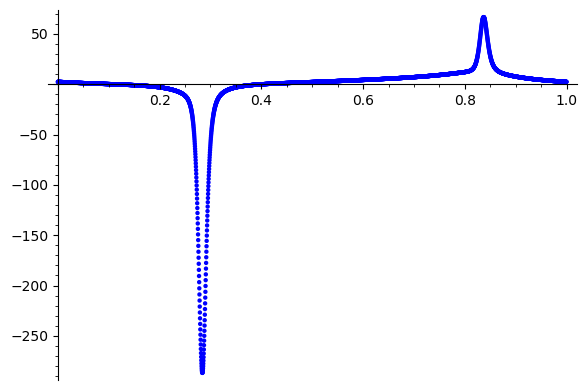

In [32]:
list_plot(t_py)

In [33]:
# интегральная сумма количества импульса, вытекающего в единицу времени из объема воображаемой сферы по периоду
# она же
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду
sum_py = 0
for (t_i, py) in t_py:
    sum_py += py * dt
sum_py

-17.222666699873898024

In [34]:
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду отнесённая к периоду
sum_py / T

-2.1928580308072890763

In [35]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

0.25425309564867471003

In [36]:
sum_py/sum_fy

-8.624705336281789777

In [37]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через верхнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду
sum_py_up = 0
for (t_i, py) in t_py_up:
    sum_py_up += py * dt
sum_py_up

-56.198103398551282627

In [38]:
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду отнесённая к периоду
sum_py_up / T

-7.1553647586151040766

In [39]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через нижнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду
sum_py_dw = 0
for (t_i, py) in t_py_dw:
    sum_py_dw += py * dt
sum_py_dw

38.97543669867738464

In [40]:
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду отнесённая к периоду
sum_py_dw / T

4.962506727807815005

In [41]:
# интеграл силы приложенной к поверхности верхней воображаемой полусферы по периоду

Maxwells_stress_tensor_R_upper_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R_t, \
        [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [0, T]], opts=nquad_opts_2)
#                theta                  varphi                t

In [42]:
# интеграл силы приложенной к поверхности верхней воображаемой полусферы по периоду

Maxwells_stress_tensor_R_upper_half_sphere
# 'epsabs' : 1.0e-01, 'epsrel' : 1.0e-03, 'limit'  : 100
# (-5.619771707649721, 0.09951167416151144)
# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 100
# (-5.619810340078861, 2.5359979462970916e-07)

(-56.19810339913391, 1.425492829483015e-05)

In [43]:
# интеграл силы приложенной к поверхности нижней воображаемой полусферы по периоду

Maxwells_stress_tensor_R_down_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R_t, \
        [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [0, T]], opts=nquad_opts_2)
#                theta                            varphi                   t

In [44]:
# интеграл силы приложенной к поверхности нижней воображаемой полусферы по периоду
Maxwells_stress_tensor_R_down_half_sphere
# 'epsabs' : 1.0e-01, 'epsrel' : 1.0e-03, 'limit'  : 100
# (3.8978874205212657, 0.09897620978994888)
# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 100
# (3.8975436700805086, 1.3240039717966676e-07)

(38.97543669866311, 3.4945858402715463e-06)

In [45]:
Maxwells_stress_tensor_R_upper_half_sphere[0] + Maxwells_stress_tensor_R_down_half_sphere[0]

-17.222666700470803

In [46]:
# интеграл силы приложенной к поверхности воображаемой сферы по периоду

Maxwells_stress_tensor_R = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R_t, \
        [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [0, T]], opts=nquad_opts_2)
#                theta                  varphi              t

In [47]:
# интеграл силы приложенной к поверхности воображаемой сферы по периоду
Maxwells_stress_tensor_R
# v_c = np.float128(0.984)
#         result                  abserr
# (-1.553907207973527e-07,  1.0236458948831668)   # 'epsabs' : 1.49e-03, 'epsrel' : 1.49e-03, 'limit'  : 50
# (-1.5539075127251786e-07, 0.009103807089559712) # 'epsabs' : 1.49e-05, 'epsrel' : 1.49e-05, 'limit'  : 200

# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 200
# IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
#  the requested tolerance from being achieved.  The error may be 
#  underestimated.

# './results/stress_tensor_vc=0.8_Rl=10.0_S=0.5_sphere_R=61.5_tsn=3600'
# -1.7222666724181730717
# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 100
# (-1.7222666701014222, 1.4259473161124864e-07)
# (-1.7222666701014226, 1.4259473243003793e-07)

# './results/stress_tensor_vc=0.8_Rl=1.0_S=0.05_sphere_R=6.1499999999999995_tsn=3600'
# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 100
# (-17.22266669994365, 1.4259473519176882e-05)

(-17.22266669994365, 1.4259473519176882e-05)

In [51]:
# интеграл силы приложенной к поверхности воображаемой сферы по периоду отнесённый к периоду
Maxwells_stress_tensor_R[0] / T

-2.1928580308161703947

In [48]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
int_fy

(1.9968991436065568, 4.825394424371916e-10)

In [49]:
# интеграл силы приложенной к поверхности воображаемой сферы по периоду
# отнесённый к
# интегралу компоненты силы по оси y, приложенной к зарядам, по периоду
Maxwells_stress_tensor_R[0]/int_fy[0]

-8.624705336313662

In [126]:
arr_vc = [
    0.0000001, 
    0.0000002, 
    0.0000003, 
    0.0000004, 
    0.0000005, 
    0.0000006, 
    0.0000007, 
    0.0000008, 
    0.0000009, 
    0.000001, 
    0.000002, 
    0.000003, 
    0.000004, 
    0.000005, 
    0.000006, 
    0.000007, 
    0.000008, 
    0.000009, 
    0.00001, 
    0.00002, 
    0.00003, 
    0.00004, 
    0.00005, 
    0.00006, 
    0.00007, 
    0.00008, 
    0.00009, 
    0.0001, 
    0.0002, 
    0.0003, 
    0.0004, 
    0.0005, 
    0.0006, 
    0.0007, 
    0.0008, 
    0.0009, 
    0.001, 
    0.002, 
    0.003, 
    0.004, 
    0.005, 
    0.006, 
    0.007, 
    0.008, 
    0.009, 
    0.01, 
    0.02, 
    0.03,
    0.04,
    0.05,
    0.06,
    0.07,
    0.08,
    0.09,
    0.10,
    0.15,
    0.20,
    0.25,
    0.30,
    0.40,
    0.50,
    0.60,
    0.70,
    0.80,
    0.90,
]

In [127]:
nquad_opts_2 = { 'epsabs' : 1.0e-07,
                 'epsrel' : 1.0e-07,
                 'limit'  : 100 }

In [128]:
def calc_f_vc(N):
    f_vc = []
    for vc in arr_vc:
        set_vc(vc)
        #print("get_omega_d(",vc,")=", get_omega_d(vc))
        T = np.float128(2*pi)/get_omega() # период вращения
        print("T = ", T)
        # интеграл силы по периоду
        
        # интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
        int_fy = scipy_integrate.quad(lambda t : calc_sum_Fy_t(N=N, t = t), 0, T)
        # интеграл силы приложенной к поверхности верхней воображаемой полусферы по периоду
        Maxwells_stress_tensor_R_upper_half_sphere = scipy_integrate.nquad( \
            spherical_calc_Maxwells_stress_tensor_R_t, \
                [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [0, T]], opts=nquad_opts_2)
        Maxwells_stress_tensor_R_down_half_sphere = scipy_integrate.nquad( \
            spherical_calc_Maxwells_stress_tensor_R_t, \
                [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [0, T]], opts=nquad_opts_2)
        print("vc=", vc,
              "fy=", int_fy, int_fy[0]/T,
              "py_up=", Maxwells_stress_tensor_R_upper_half_sphere, Maxwells_stress_tensor_R_upper_half_sphere[0]/T,
              "py_dw=", Maxwells_stress_tensor_R_down_half_sphere, Maxwells_stress_tensor_R_down_half_sphere[0]/T
             )
        f_vc += [(vc, int_fy[0]/T, Maxwells_stress_tensor_R_upper_half_sphere[0]/T, Maxwells_stress_tensor_R_down_half_sphere[0]/T)]
    return f_vc

In [129]:
f_vc = calc_f_vc(N=1)

T =  62831853.071795865162
vc= 1.00000000000000e-7 fy= (-8.776563589958555e-12, 2.3798598407447543e-13) -1.3968334787022544792e-19 py_up= (1.0221980554302419e-22, 4.8106961559449274e-26) 1.6268787334064621874e-30 py_dw= (-1.0221980554302419e-22, 4.8106961559237685e-26) -1.6268787334064621874e-30
T =  31415926.535897932581
vc= 2.00000000000000e-7 fy= (-2.880397399674631e-11, 1.8611898094442834e-11) -9.168589684545184258e-19 py_up= (68.43236345406815, 2.8794659335234428e-06) 2.1782697822352229746e-06 py_dw= (-67.69076173505387, 2.817385217015929e-06) -2.1546638663579089546e-06
T =  20943951.023931955055
vc= 3.00000000000000e-7 fy= (-6.953723922144345e-11, 3.631734976737562e-11) -3.3201586053169034168e-18 py_up= (68.61096386948604, 9.57029068261183e-07) 3.2759322150384413938e-06 py_dw= (-67.49861261471378, 9.262387615077683e-07) -3.222821354842997978e-06
T =  15707963.2679489662905
vc= 4.00000000000000e-7 fy= (-1.2792702357857878e-10, 5.972741329647436e-11) -8.144087263025703383e-18 py_up

/tmp/ipykernel_343/1032238879.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int_fy = scipy_integrate.quad(lambda t : calc_sum_Fy_t(N=N, t = t), Integer(0), T)


vc= 0.0000600000000000000 fy= (5.42289049631912e-05, 8.336496344326164e-08) 5.1784789700114978654e-10 py_up= (23.686073142914584, 8.155486810323964e-07) 0.00022618533738786247816 py_dw= (-0.43712776607936965, 9.813483144653142e-08) -4.1742626840549650524e-06
T =  89759.790102565525466
vc= 0.0000700000000000000 fy= (2.777287385658819e-05, 1.2695582952953745e-08) 3.0941331107005765844e-10 py_up= (19.290052987103234, 6.357828489913821e-07) 0.00021490750997814424844 py_dw= (-1.3353780529093662, 9.813481489862713e-08) -1.4877241261186931343e-05
T =  78539.81633974482148
vc= 0.0000800000000000000 fy= (1.1137166761386852e-05, 3.860277960591142e-09) 1.4180281136907782992e-10 py_up= (13.876427037568671, 3.784444446475551e-07) 0.0001766801564386463949 py_dw= (-4.7530526011992595, 4.5538201298711556e-07) -6.0517745300532267202e-05
T =  69813.17007977317596
vc= 0.0000900000000000000 fy= (1.6460755582421494e-06, 3.079770257678551e-10) 2.3578295561729024785e-11 py_up= (12.586411416686609, 9.81347741

vc= 0.0800000000000000 fy= (0.00010495489230666344, 1.7393211363376155e-12) 1.3363271929826419342e-06 py_up= (0.01679131658360095, 5.241834201109773e-08) 0.00021379368282408061364 py_dw= (-0.019899525308174203, 5.068859773207622e-08) -0.0002533686254382557128
T =  69.81317007977318294
vc= 0.0900000000000000 fy= (0.00016788697973835892, 1.548968968095104e-12) 2.4048038435515829514e-06 py_up= (0.013003397892033496, 3.830878871996512e-08) 0.00018625995463570764825 py_dw= (-0.017006734344167548, 3.6857437440724974e-08) -0.00024360352530524712006
T =  62.831853071795858833
vc= 0.100000000000000 fy= (0.00025550025751257255, 2.103438206108133e-12) 4.066412894437809151e-06 py_up= (0.009049085582487218, 9.14219838527666e-08) 0.00014402067009144439202 py_dw= (-0.014088100083617659, 8.706896508675657e-08) -0.00022421907670810946363
T =  41.887902047863909763
vc= 0.150000000000000 fy= (0.0012814660771625075, 2.8959176620150293e-12) 3.059274908774898554e-05 py_up= (-0.018581528306780882, 6.38230092

In [130]:
def latex_arr_lst(f_vc, titles, indexes):
    ltx = "\\begin{array}{"
    for index in indexes:
        ltx += 'c'
    ltx += "} "
    ititle = 0
    for title in titles:
        ltx += title
        if ititle < len(titles) - 1:
            ltx += " & "
        else:
            ltx += " \\\\"
        ititle += 1
    for (vc, fy, py_up, py_dw) in f_vc:
        ltx += " "
        ltx += "{:.7f} ".format(vc)
        ltx += " & "
        ltx += "{:.6e}".format(fy)
        ltx += " & "
        ltx += "{:.6e}".format(py_up)
        ltx += " & "
        ltx += "{:.6e}".format(py_dw)
        ltx += " & "
        ltx += "{:.6e}".format(py_up+py_dw)
        ltx += " & "
        #ltx += "{:.6e}".format(fy/(py_up+py_dw))
        #ltx += " & "
        ltx += "{:.6e}".format((py_up+py_dw)/fy)
        ltx += " & "
        ltx += "{:.6e}".format(fy+(py_up+py_dw))
        ltx += " \\\\" 
    ltx += "\\end{array}"
    return ltx

In [131]:
from IPython.display import display, Math, Latex
titles = ["\\frac{v}{c}","f_y",
          "\\int\\limits_{S^{up}}^{} T_{yn} dS",
          "\\int\\limits_{S^{dw}}^{} T_{yn} dS",
          "\\int\\limits_{S}^{} T_{yn} dS",
          #"\\frac{f_y}{f_{h \\nu}}",
          "\\frac{f_{h \\nu}}{f_y}",
          "{f_y}+{f_{h \\nu}}",
         ]
ltx = latex_arr_lst(f_vc, titles, indexes = [0, 1, 2, 3, 4])
display(Math(ltx))

<IPython.core.display.Math object>

In [156]:
def plot_lst(f_vc, titles, min_vc, max_vc):
    vc_fy = []
    vc_py_up = []
    vc_py_dw = []
    vc_py = []
    vc_py_fy = []
    vc_pyfy = []
    ititle = 0
    for (vc, fy, py_up, py_dw) in f_vc:
        #print(vc, fy, py_up, py_dw)
        if vc < min_vc:
            continue
        if vc > max_vc:
            break
        vc_fy    += [(vc, fy)]
        vc_py_up += [(vc, py_up)]
        vc_py_dw += [(vc, py_dw)]
        vc_py    += [(vc, (py_up+py_dw))]
        vc_py_fy += [(vc, (py_up+py_dw)/fy)]
        vc_pyfy  += [(vc, fy+(py_up+py_dw))]
    list_plot(vc_fy, color="green").show(title="$"+titles[1]+"$")
    list_plot(vc_py_up).show(title="$"+titles[2]+"$")
    list_plot(vc_py_dw, color="red").show(title="$"+titles[3]+"$")
    (list_plot(vc_py_up)+list_plot(vc_py_dw, color="red")).show(title="$"+titles[1] +","+ titles[2]+"$")
    list_plot(vc_py).show(title="$"+titles[4]+"$")
    (list_plot(vc_fy, color="green")+list_plot(vc_py)).show(title="$"+titles[1]+","+titles[4]+"$")
    list_plot(vc_py_fy).show(title="$"+titles[5]+"$")
    list_plot(vc_pyfy).show(title="$"+titles[6]+"$")

In [157]:
titles = ["\\frac{v}{c}",
          "f_y",
          "\\int_{S^{up}}^{} T_{yn} dS",
          "\\int_{S^{dw}}^{} T_{yn} dS",
          "\\int_{S}^{} T_{yn} dS",
          #"\\frac{f_y}{f_{h \\nu}}",
          "\\frac{f_{h \\nu}}{f_y}",
          "{f_y}+{f_{h \\nu}}",
         ]

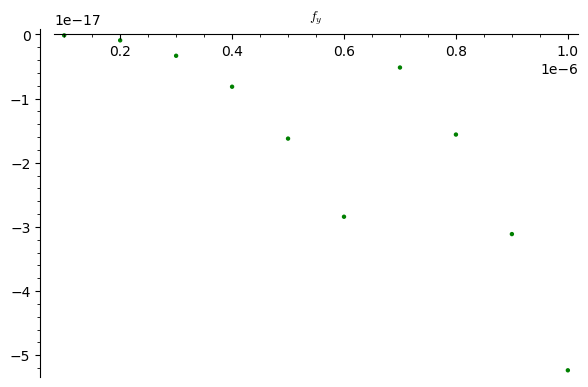

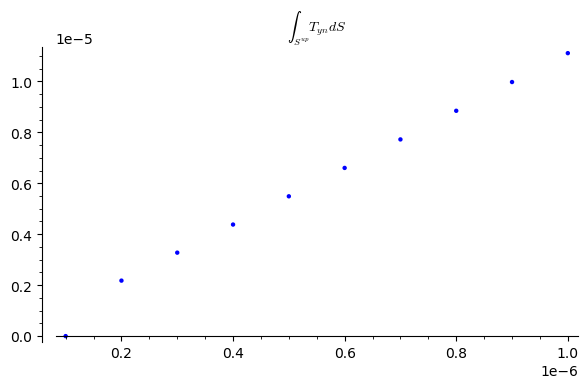

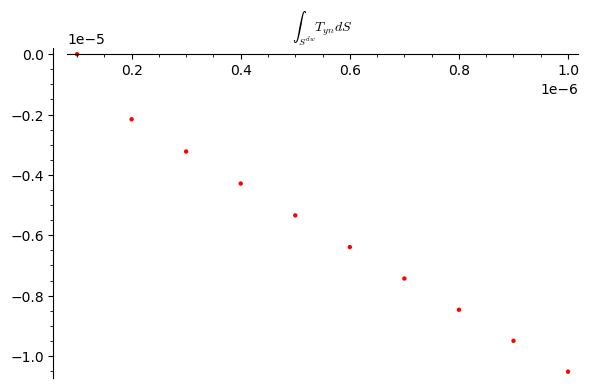

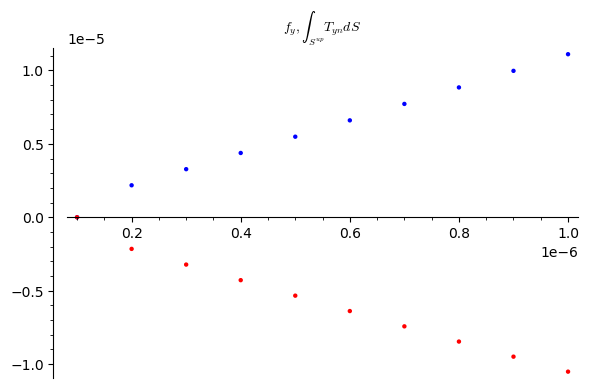

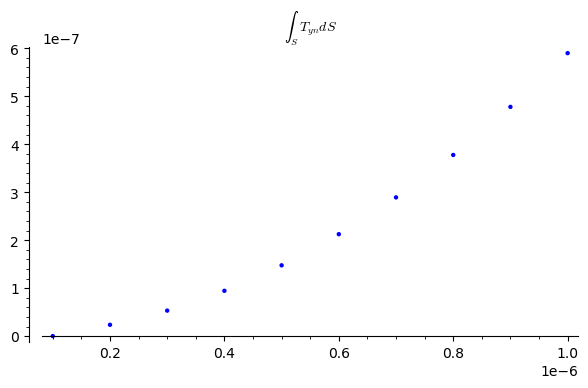

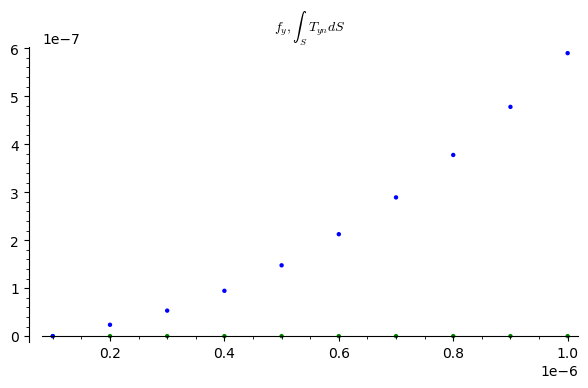

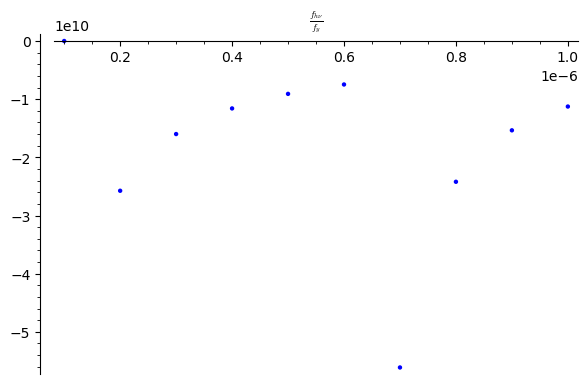

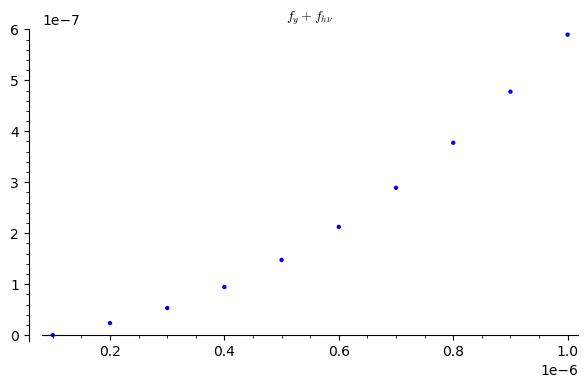

In [159]:
plot_lst(f_vc, titles, min_vc=0, max_vc=0.000001)

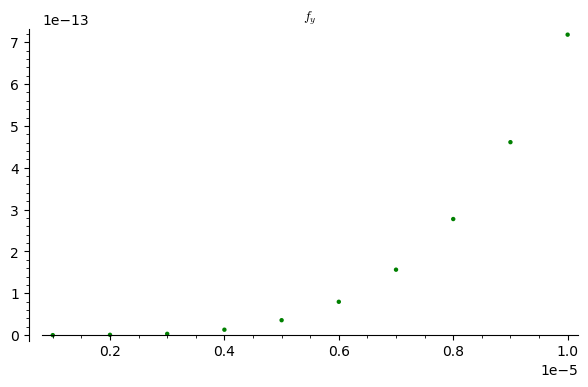

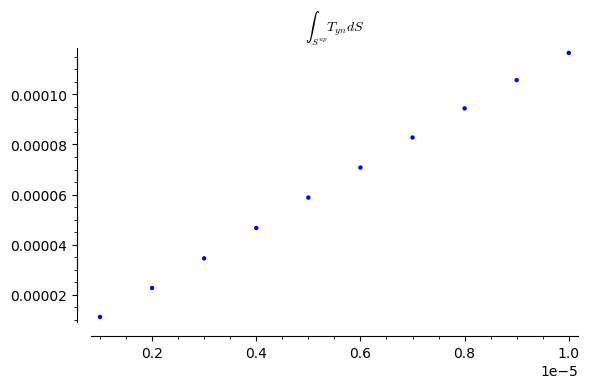

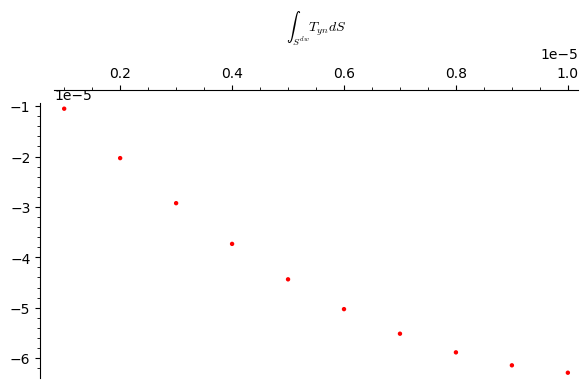

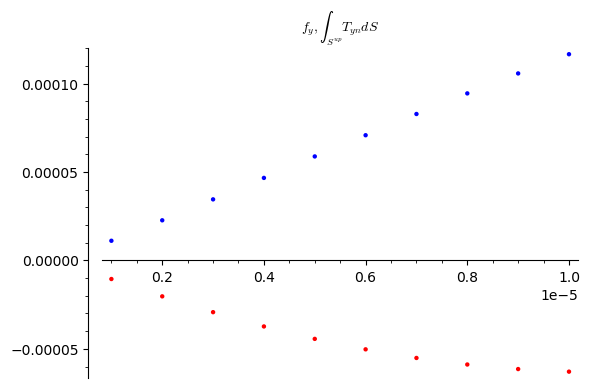

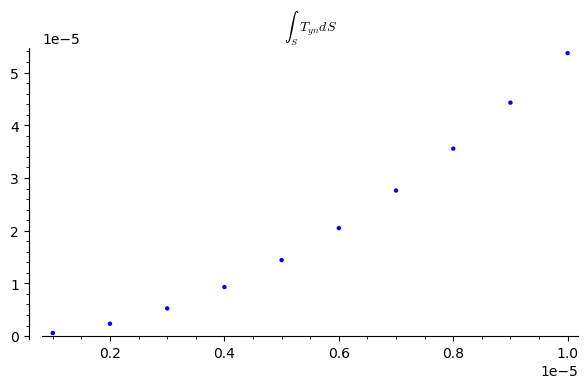

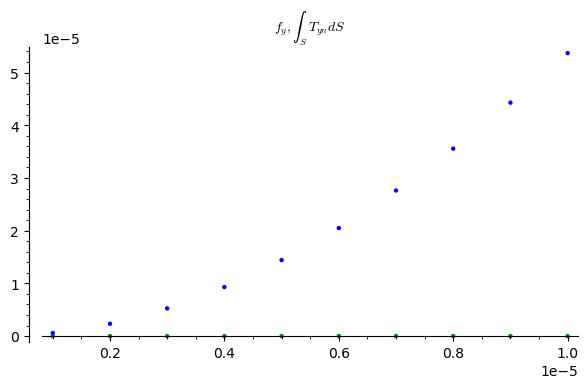

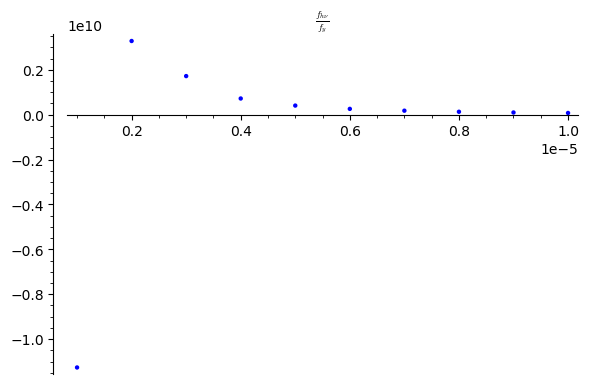

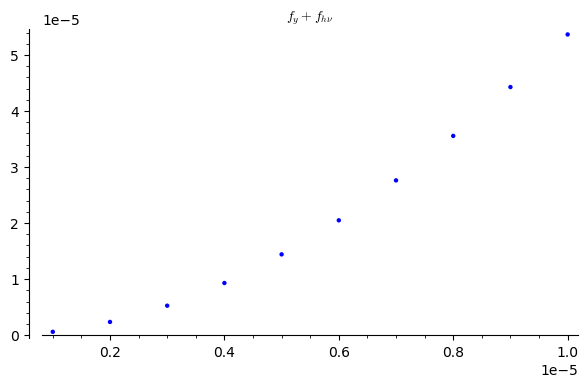

In [160]:
plot_lst(f_vc, titles, min_vc=0.000001, max_vc=0.00001)

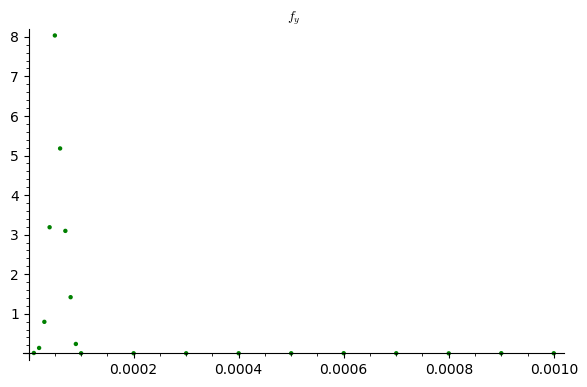

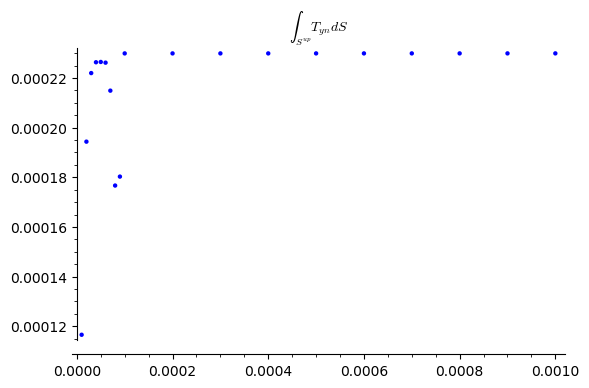

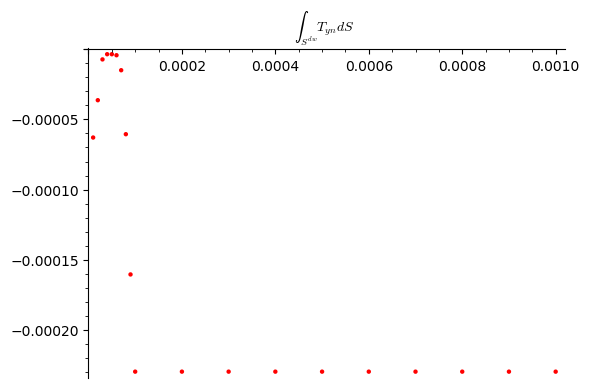

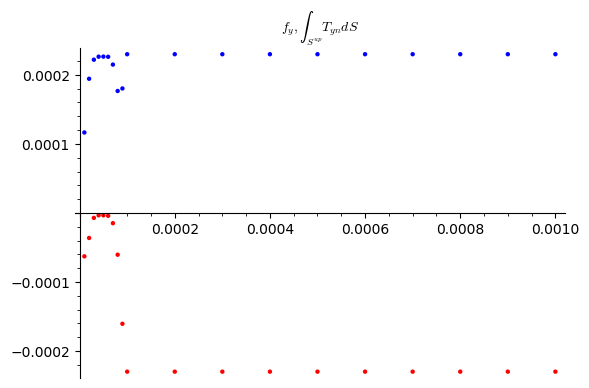

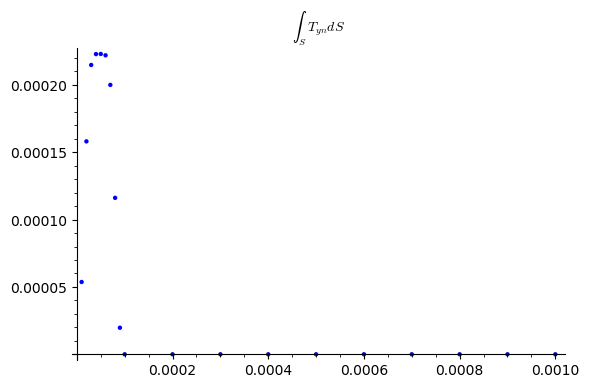

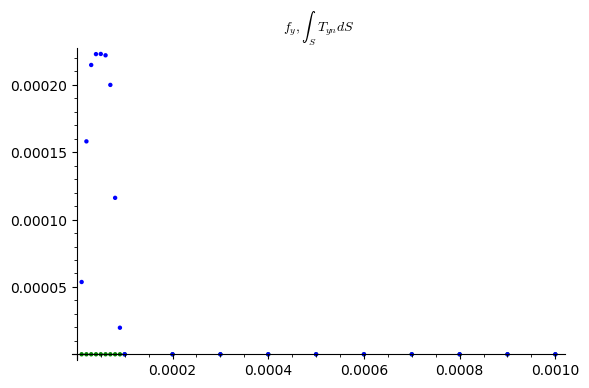

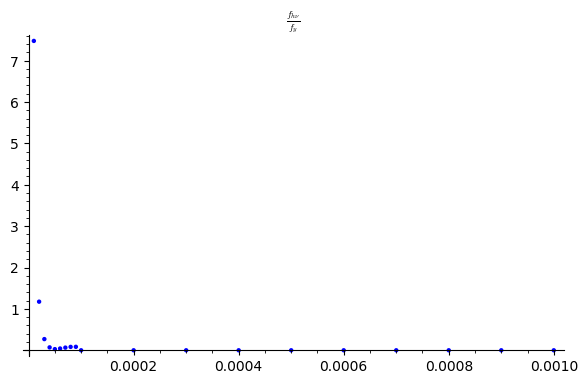

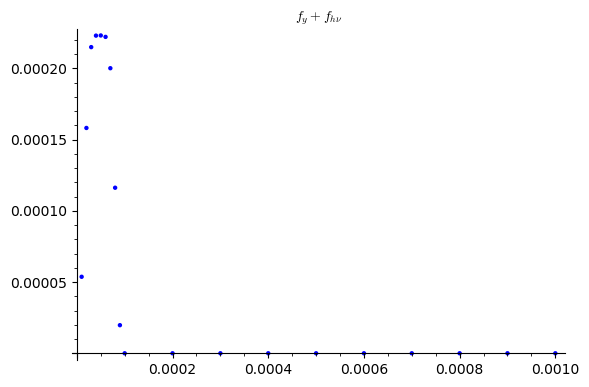

In [164]:
plot_lst(f_vc, titles, min_vc=0.00001, max_vc=0.001)

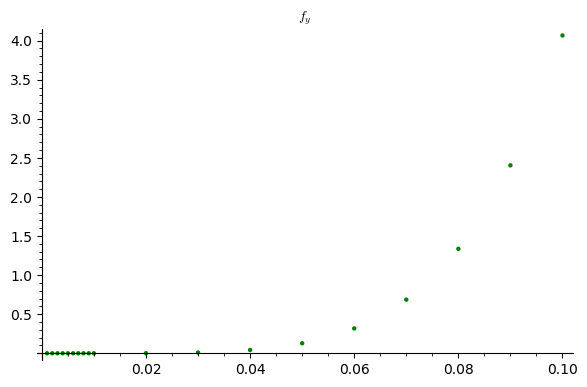

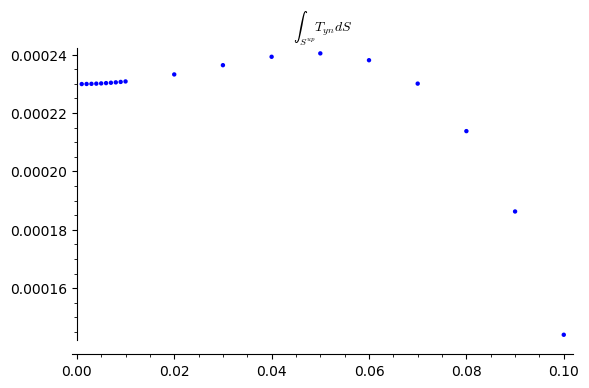

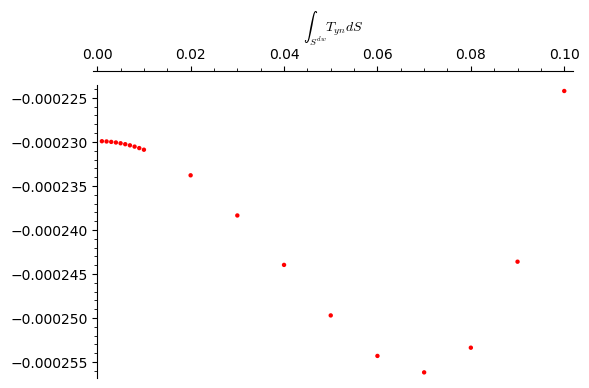

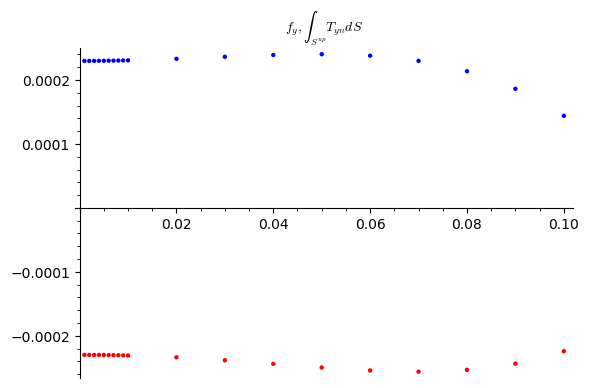

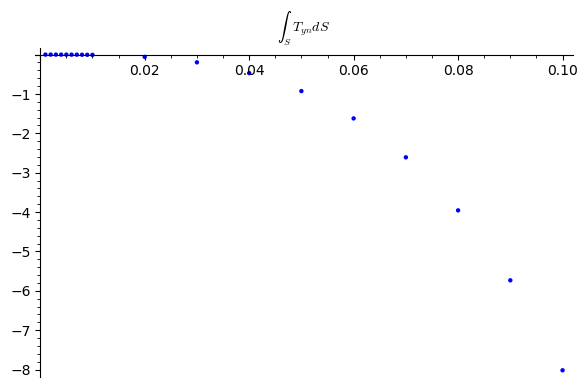

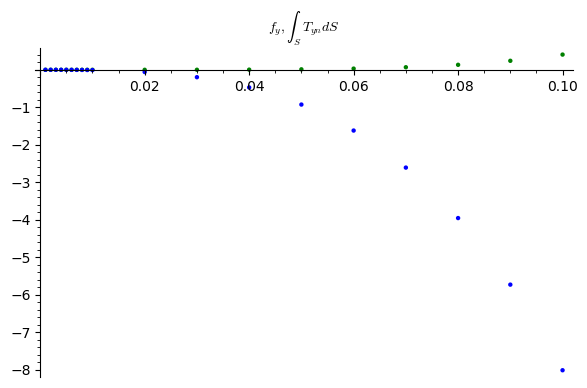

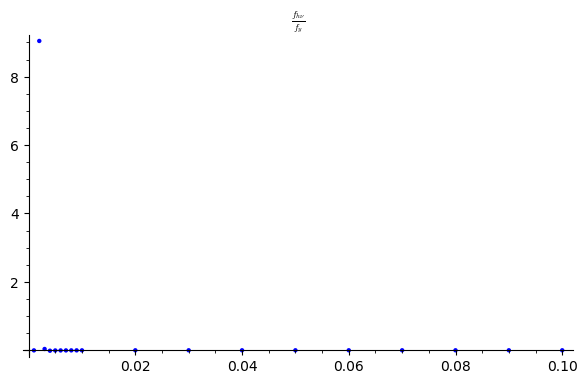

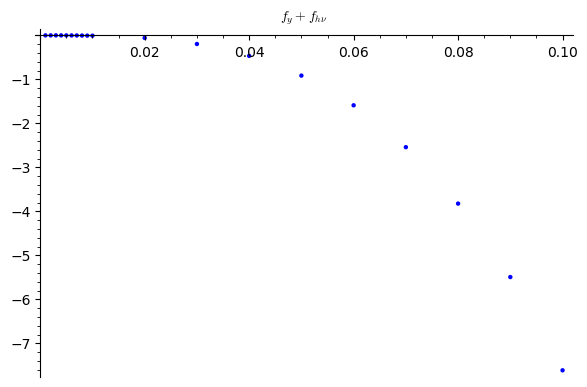

In [165]:
plot_lst(f_vc, titles, min_vc=0.001, max_vc=0.1)

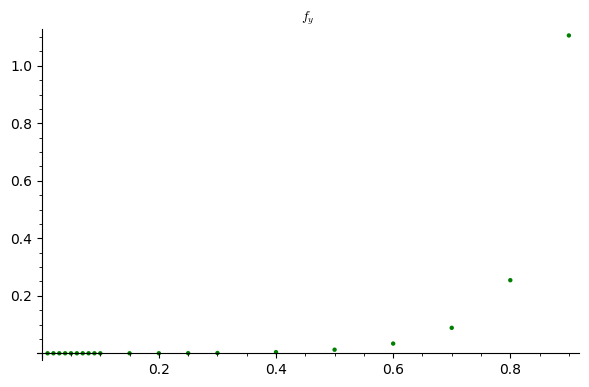

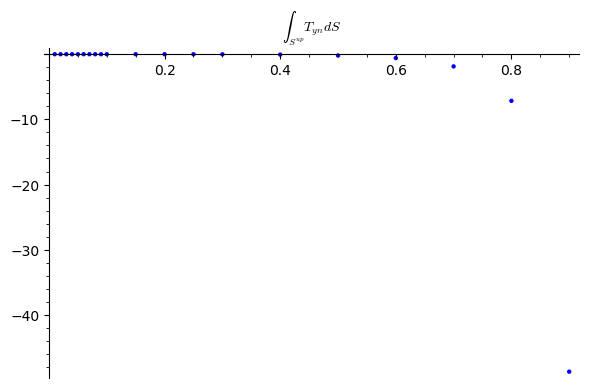

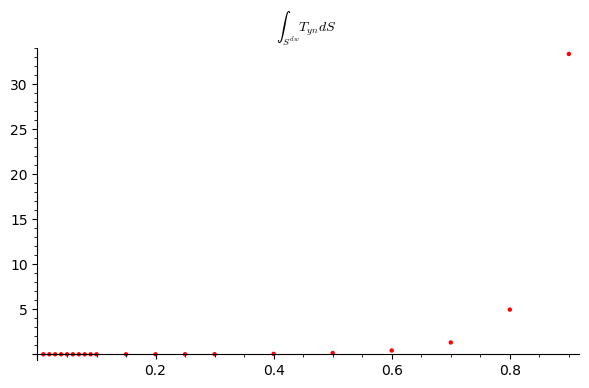

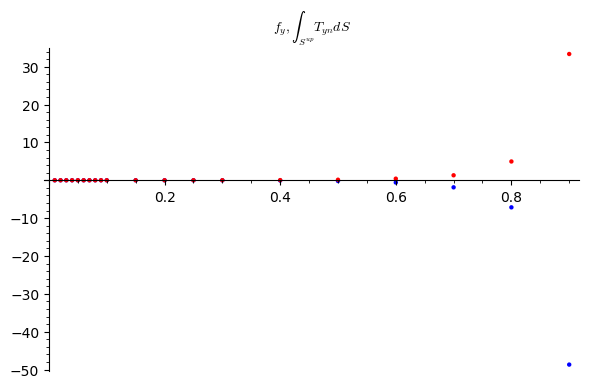

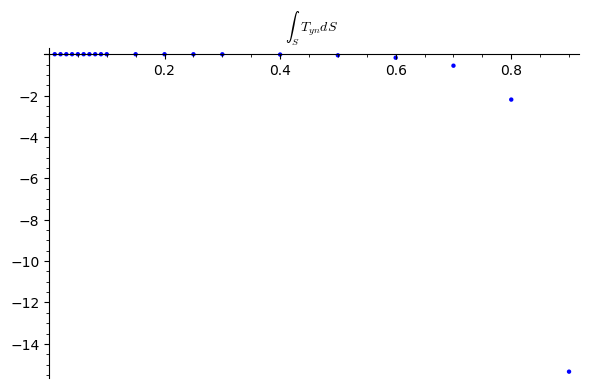

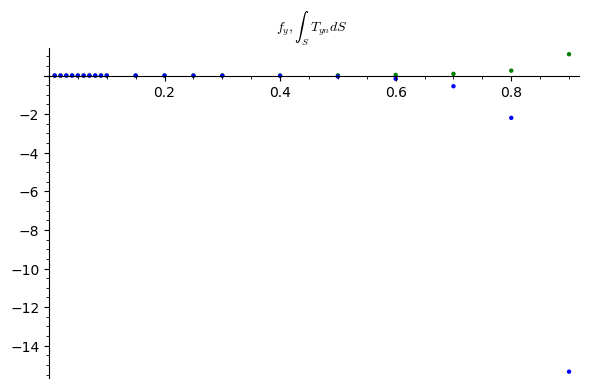

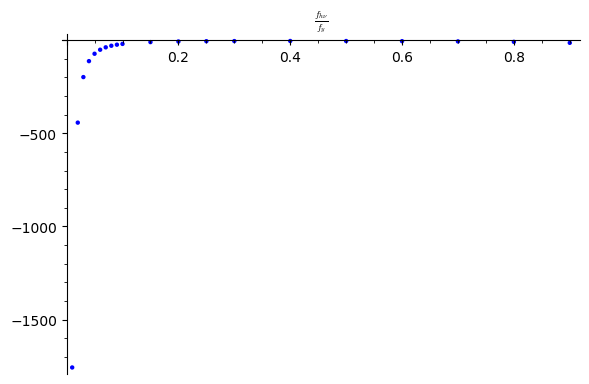

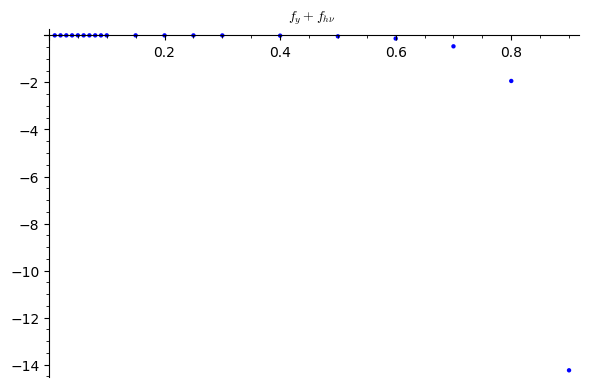

In [167]:
plot_lst(f_vc, titles, min_vc=0.01, max_vc=0.9)